In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
import rsfs
from sklearn.model_selection import train_test_split
%matplotlib inline
import tensorflow as tf

In [3]:
df=pd.read_csv("./Repos/ECG-Signal-Classification/filtered_signals.csv")
df = df.drop('Unnamed: 0', axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: './Repos/ECG-Signal-Classification/filtered_signals.csv'

In [ ]:
t1 = time()
Data = np.loadtxt(open(str('./Repos/ECG-Signal-Classification/filtered_signals.csv'), "rb"), delimiter=",", skiprows=1)
labels = Data[:, -1]
Data = Data[:, :-1]
train, test, train_labels, test_labels = train_test_split(
  Data, labels, test_size=0.33, random_state=42, stratify=labels)
data_train = train
data_test = test
label_train = train_labels
label_test = test_labels
Parameters = {
  'RSFS': {
      'Classifier': 'KNN',
      'Classifier Properties': {
          'n_neighbors': 3,
          'weights': 'distance'
      },
      'Dummy feats': len(labels),
      'delta': 0.05,
      'maxiters': 300000,
      'fn': 'sqrt',
      'cutoff': 0.90,
      'Threshold': 1000,
  },
  'Verbose': 1
}
Ex_Features = rsfs.RSFS(train,test,train_labels,test_labels,Parameters)['F_RSFS'][0]
print(Ex_Features)
print(time() - t1,"seconds")


In [10]:
X = df[df.columns[:-1]].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (335, 4097) (335,)
Test set: (165, 4097) (165,)


In [12]:
Xrsfs = df[df.columns[list(Ex_Features)]]
Xrsfs = Xrsfs.iloc[:,:-1]
Xrsfs

X_rsfstrain, X_rsfstest, y_rsfstrain, y_rsfstest = train_test_split( Xrsfs, y, test_size=0.33, random_state=4)
print ('Train set:', X_rsfstrain.shape,  y_rsfstrain.shape)
print ('Test set:', X_rsfstest.shape,  y_rsfstest.shape)



Train set: (335, 262) (335,)
Test set: (165, 262) (165,)


## With all features

In [122]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('LR', LogisticRegression()))
models.append(('ADAB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')))
models.append(('xgb', XGBClassifier()))
models.append(('sgd', SGDClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
acc = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	acc.append(cv_results.mean())
	print(msg)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

LR: 0.620000 (0.147784)
ADAB: 0.958000 (0.038419)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.968000 (0.028566)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


xgb: 0.972000 (0.025612)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


sgd: 0.572000 (0.136587)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.836000 (0.054991)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.828000 (0.020396)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.940000 (0.044721)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.976000 (0.030725)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.964000 (0.033226)


## with rsfs features

In [123]:
# prepare configuration for cross validation test harness
seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('ADAB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')))
models.append(('xgb', XGBClassifier()))
models.append(('sgd', SGDClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
resultsrsfs = []
names = []
accrsfs = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xrsfs, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	accrsfs.append(cv_results.mean())
	print(msg)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

LR: 0.524000 (0.088000)
ADAB: 0.962000 (0.036277)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.976000 (0.026533)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


xgb: 0.974000 (0.022000)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


sgd: 0.522000 (0.093145)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.840000 (0.047329)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.830000 (0.020494)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.948000 (0.040200)
NB: 0.968000 (0.037094)


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.966000 (0.029732)


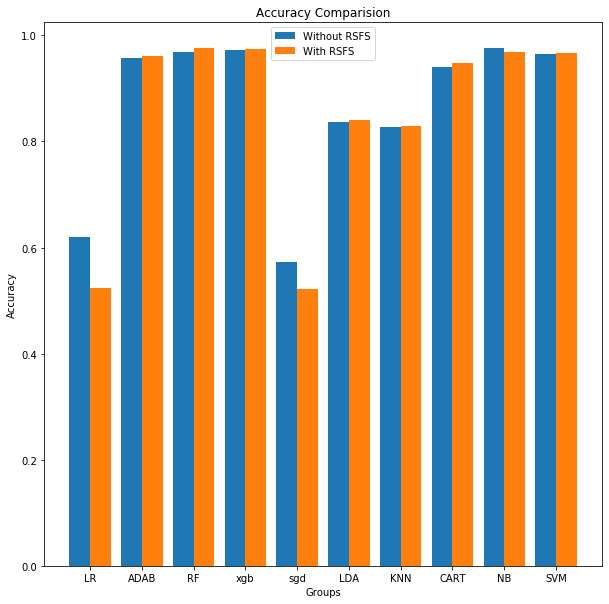

In [124]:
X = names

plt.figure(figsize = (10,10)) 
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, acc, 0.4, label = 'Without RSFS')
plt.bar(X_axis + 0.2, accrsfs, 0.4, label = 'With RSFS')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision")
plt.legend()
plt.show()

In [125]:
acc

[0.62,
 0.958,
 0.968,
 0.9719999999999999,
 0.572,
 0.836,
 0.828,
 0.9399999999999998,
 0.9760000000000002,
 0.9640000000000001]

In [126]:
accrsfs

[0.524,
 0.962,
 0.9760000000000002,
 0.974,
 0.522,
 0.8400000000000001,
 0.8299999999999998,
 0.9480000000000001,
 0.968,
 0.966]

In [127]:
accrsfs

[0.524,
 0.962,
 0.9760000000000002,
 0.974,
 0.522,
 0.8400000000000001,
 0.8299999999999998,
 0.9480000000000001,
 0.968,
 0.966]

In [14]:
Xrsfs['Label'] = y
Xrsfs

,0,22,79,103,110,113,136,152,154,196,...,3841,3862,3872,3874,3875,3885,3899,3948,3968,Label
0,-15.979399,-61.590045,-35.612190,-36.049572,6.126970,3.519763,13.753745,-46.246450,-47.470310,5.451132,...,-9.123440,5.332019,-14.201666,11.536756,19.707823,-8.879842,16.655439,-40.661351,-22.297217,0
1,-9.449462,34.156805,-37.387783,-18.621420,-10.157801,-29.569994,15.401767,14.014285,7.188024,28.976996,...,-12.963881,-55.550512,-20.196530,-39.013987,-65.676280,-35.651971,47.923960,33.660947,19.564678,0
2,-19.111807,-92.940752,37.815851,26.006295,10.386153,46.450210,-11.703717,1.498500,34.042303,-26.606372,...,74.340675,-9.503054,25.946928,35.941308,39.722973,-38.091846,39.537914,9.298404,-45.540408,0
3,-15.947554,29.944793,6.161303,-62.401662,-3.486773,31.939308,20.628554,81.533730,58.783770,-15.528215,...,8.274328,-29.778209,44.681682,36.113233,31.696706,-20.943775,-7.133493,15.525359,-31.791953,0
4,7.772188,-48.241527,1.528408,8.691027,12.134514,-26.473751,9.396993,-44.467833,-63.806612,-41.131723,...,49.344957,61.133286,-0.359259,-20.143756,-16.442831,81.221735,-12.590934,-23.946693,-56.429643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,39.651971,59.622565,-31.294614,-28.510627,1.615939,125.170891,-49.450404,-84.772783,-53.217639,126.662751,...,-130.865673,165.773362,-79.880902,-38.212614,-21.611605,-45.218689,-49.104286,13.794101,-123.415230,1
496,-0.730217,-221.236986,-337.340827,32.745909,74.800733,46.394351,-178.430476,75.691799,106.844601,-19.569266,...,262.301512,8.839484,-63.895137,-47.666493,-36.634465,-40.590641,-16.331366,91.744624,179.993952,1
497,75.046048,-127.467261,-429.883846,-380.023695,411.644522,626.608323,-420.421130,371.290032,286.556547,-325.899369,...,-159.563122,83.582818,-235.663436,-160.504625,-142.971076,-149.812065,-63.881129,-96.568951,61.651551,1
498,619.260498,387.608333,-138.976485,1168.003415,7.069898,-149.680306,901.807382,-252.445198,-283.156232,-590.869159,...,-823.067307,-80.535322,10.170783,-180.186636,-426.613227,860.278361,-58.910481,-245.480858,568.471126,1


In [16]:
Xrsfs.to_csv("Extracted Features.csv")